<a href="https://colab.research.google.com/github/SanieRojas/Initial-Steps-in-Data-Viz/blob/master/Random_Walks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to generate random walks in python using numpy? 

For today´s challenge we´re going to create a simple random walk in python using numpy library, and we´re going to explore results that we obtain through the law of large numbers.

We have all seen the famous interview [question](https://towardsdatascience.com/over-100-data-scientist-interview-questions-and-answers-c5a66186769a "100 Interview Questions Addressed"): 

### Q: You are at a Casino and have two dices to play with. You win $10 every time you roll a 5. If you play till you win and then stop, what is the expected payout?


Let’s assume that it costs $5 every time you want to play.
There are 36 possible combinations with two dice.
Of the 36 combinations, there are 4 combinations that result in rolling a five (see blue). This means that there is a 4/36 or 1/9 chance of rolling a 5.
A 1/9 chance of winning means you’ll lose eight times and win once (theoretically).  




Therefore, your expected payout is equal to $10.00 * 1 -$5.00 * 9= -$35.00.



***

![Dice Alternatives](https://miro.medium.com/max/1400/1*d4QXfhHpJkWBNhEclHxGaw.png)




Interesting. But what if we could test this if this is directionally correct, by replicating randomly, say 5000 dices rolled to see how many of these games end up close to the -35$ mark? Would it give us the 11.11% chance we´re seeing here? Let´s check. 

We´re about to apply the random walk technique to test that out, meaning we will randomly replicate the results of each of the dice rollings. Then we will repeat the process a large amount of times. 


But what is a random walk? Let´s look at what wikipedia says. 



>A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on the integer number line, which starts at 0 and at each step moves +1 or −1 with equal probability. Random walks have applications to engineering and many scientific fields including ecology, psychology, computer science, physics, chemistry, biology as well as economics. The term random walk was first introduced by Karl Pearson in 1905. - Wikipedia definition


Cool, right? For more detailed information on how random walks work, check this MIT learning resource in this link >
[Random Walks](https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm)

And what is a montecarlo simulation? 

>Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches.   
Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

So, if we take multiple samples – say the first sample of 10 rolls and compute of the mean for that sample, and then again, we take a next sample of say 20 rolls and do the same. We repeat the process by getting a large number of random samples which are independent of each other – then the ‘mean of the means’ of these samples will give the approximate mean of the whole population as per the central limit theorem. Also, the histogram of the means will represent the bell curve as per the central limit theorem. 



## The rand function
So, how can we recreate a random walk using Numpy in Python? We will use the `np.random.rand()` function to generate random numbers in order to obtain random numbers first.
It is possible to insert two parameters to define the range in which the randoms number are going to be generated. The default range is between 0 and 1, making it very useful for random probability simulations. 

In [16]:
import numpy as np
import pandas as pd 
from pandas.plotting import bootstrap_plot

np.random.rand()

0.11690024150890721

## The seed.  
A very cool feature is that, you can make the numbers you´re using in your simulation random, but also traceable with this amazing function called `np.random.seed()`.  
Adding an integer as parameter for this function will unleash a specific set of traceable random numbers for other people to replicate easily your models and be able to obtain the same results. That´s why they are called pseudo-random numbers. 

In [17]:
np.random.seed(123) 
print("Seed 123 gives us: " + str(np.random.randint(0,100)) + " as first result") 
print("Seed 123 gives us: " + str(np.random.randint(0,100)) + " as second result") 

np.random.seed(1234)
print("Seed 1234 gives us: " + str(np.random.randint(0,100)) + " as first result") 
print("Seed 1234 gives us: " + str(np.random.randint(0,100)) + " as second result") 

np.random.seed(123)
print("Seed 123 gives us: " + str(np.random.randint(0,100)) + " as first result again") 
print("Seed 123 gives us: " + str(np.random.randint(0,100)) + " as second result again, ensuring reproducibility of your tests") 

Seed 123 gives us: 66 as first result
Seed 123 gives us: 92 as second result
Seed 1234 gives us: 47 as first result
Seed 1234 gives us: 83 as second result
Seed 123 gives us: 66 as first result again
Seed 123 gives us: 92 as second result again, ensuring reproducibility of your tests


## The case for the casino
Are you sure you want to bet on the -35$ result? 
Let´s see what the montecarlo simulation has for us. 

In [18]:
#Setting up the seed for the excercise 
np.random.seed(123)

#Creating a list to be populated with the amount of fives obtained in 5000 rolls. 
fives = []

#Loop to roll the dices 5000 times and append a "1" for each time a 5 is obtained. 
for x in range (0,5000):
    one_roll = np.random.randint(1,7) + np.random.randint(1,7)
    if one_roll == 5: 
          fives.append(1)

#Calculates lenght of the list created and subsequent probability             
print(len(fives)) 
print("According to this random simulation of 5000 dice rollings, probability to obtain a five is of " + str(len(fives)/5000*100) + "%." )

566
According to this random simulation of 5000 dice rollings, probability to obtain a five is of 11.32%.


That is just sligthly better than the result obtained through Success/Posible cases formula. Let´s see what happens when we replicate this process a thousand times. 

In [19]:
#Setting a variable for the seed generation 
seedgen=1  

#Applying the seed function with our variable as a parameter
np.random.seed(seedgen)

#Creating the lists to be populated by the for loops. 
fives = []
thousand_scenarios = []


# Loop to replicate a thousand times rolling the dices five thousand times and appending probabilities to obtain 5 to the thousand_scenarios list. 
for y in range (0,1000):
    for x in range (0,5000):
        
        one_roll = np.random.randint(1,7) + np.random.randint(1,7)
        if one_roll == 5: 
              fives.append(1)
                
        probability = len(fives)/5000*100
     
    thousand_scenarios.append(probability) 
    fives = []
    seedgen= seedgen+1
        
print(len(thousand_scenarios))

1000


So now we have a list called thousand_scenarios with each of the probabilities obtained by the 5000 rolling dices. Let´s see how these look in a histogram

In [20]:
#Assigning a lable to the list generated in order to manipulate it more easily
df = pd.DataFrame(thousand_scenarios)
df.columns=["Probability"]
df.head(1)

,Probability
0,11.04


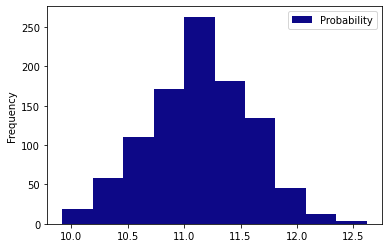

In [21]:
df.plot.hist(bins=10, cmap="plasma")

Yeah, we get it, we have just repeated indefinitely to rolling dice process in ourder to fullfill our mathematical curiosity. And since we´re here already, how about doing it one more time, and subset several groups of our series to test the bootstrap plot function from pandas. 

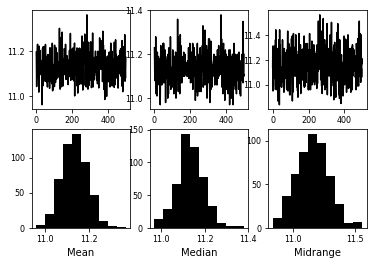

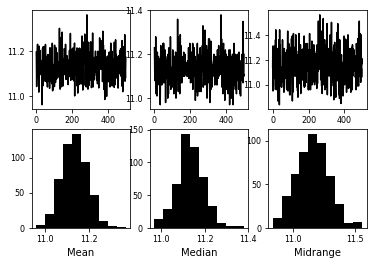

In [22]:
bootstrap_plot(df, size=60, samples=500, color='black')

So far so good, we have pretty much replicated the % obtained through the theoretical approach, with a random walk + a montecarlo simulation. 
Let´s see how this plays out, when it comes to monetary impact. Is it really going to be -35$??.   

To find out, we need to perform a few changes in our code lines above. Let´s assume you desire to at least play 10 times, let´s see if replicating the play 5000 times gives us the same result of -35$.

In [31]:
#Setting a variable for the seed generation 
seedgen=3  

#Applying the seed function with our variable as a parameter
np.random.seed(seedgen)

#Creating the lists to be populated by the for loops. 
rolls= []
set_rolls = []


for x in range (5000):    
    for x in range (10):
        roll = np.random.randint(1,7) + np.random.randint(1,7)
        rolls.append(roll)
    set_rolls.append(rolls)
    rolls = []

np_set_rolls = np.array(set_rolls)

np_set_rolls

array([[ 4,  6,  2, ...,  9,  6, 11],
       [ 4,  5,  6, ...,  4,  5,  6],
       [ 5, 11,  8, ...,  2, 12,  4],
       ...,
       [ 3,  7, 10, ...,  5,  4,  6],
       [ 5,  8,  9, ...,  4,  5,  9],
       [ 9,  8, 12, ...,  6,  8,  8]])

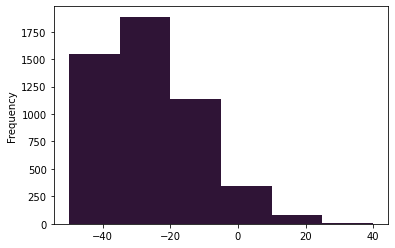

In [32]:
#Now let´s convert those into balances using the .where function from numpy
np_balances = np.where(np_set_rolls == 5, 10,-5)
np_list_balances= []

for x in np_balances:
    np_list_balances.append(sum(x))

#Let´s plot a histogram with the possible economic results of the game
pd_list_balances= pd.Series(np_list_balances)
pd_list_balances.plot.hist(bins=6, cmap="twilight_shifted_r")

As we can see, the distribution is centered around the -$35. What is the chance of earning money if you play 10 times?


In [35]:
probab = len(pd_list_balances[pd_list_balances>0])/1000*100
print("The probability of earning money is of: " + str(probab)+ "%.")

The probability of earning money is of: 8.6%.


Let´s see if the probability increases or decreases when we decide to only play 5 times. 

In [26]:
#Setting a variable for the seed generation 
seedgen=3  

#Applying the seed function with our variable as a parameter
np.random.seed(seedgen)

#Creating the lists to be populated by the for loops. 
rolls= []
set_rolls = []


for x in range (5000):    
    for x in range (5):
        roll = np.random.randint(1,7) + np.random.randint(1,7)
        rolls.append(roll)
    set_rolls.append(rolls)
    rolls = []

np_set_rolls = np.array(set_rolls)

#Now let´s convert those into balances 
np_balances = np.where(np_set_rolls == 5, 10,-5)
np_list_balances= []

for x in np_balances:
    np_list_balances.append(sum(x))

probab = len(pd_list_balances[pd_list_balances>0])/1000*100
print("The probability of earning money is of: " + str(probab)+ "%.")

The probability of earning money is of: 8.6%.


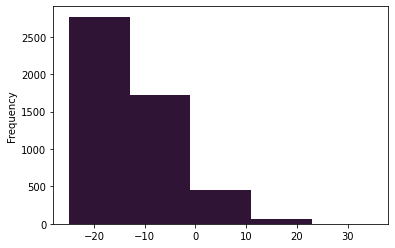

In [27]:
#Let´s plot a histogram with the possible economic results of the game
pd_list_balances= pd.Series(np_list_balances)
pd_list_balances.plot.hist(bins=5, cmap="twilight_shifted_r")